# Artificial Neural Network

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Read Dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [4]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
dataset.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

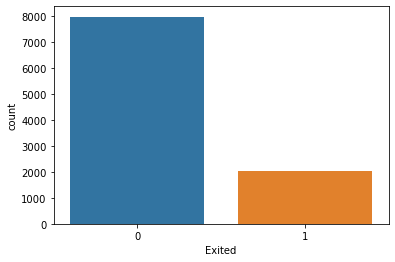

In [7]:
sns.countplot(x='Exited', data=dataset)

In [8]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

numerical_dataset = dataset[numerical_columns]

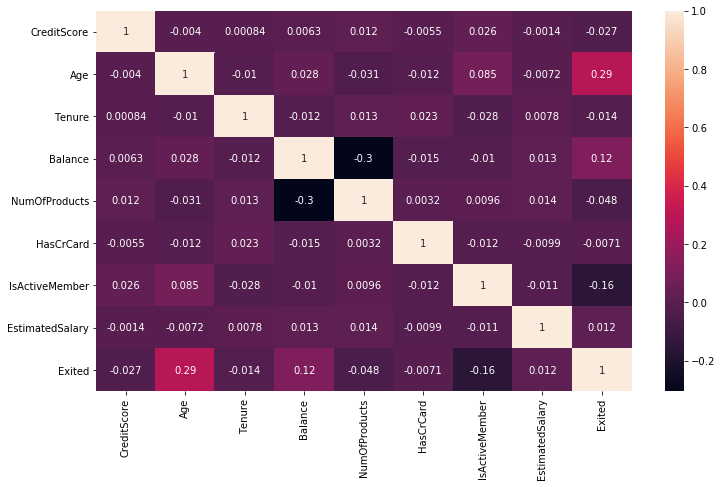

In [9]:
plt.figure(figsize=(12,7))
sns.heatmap(numerical_dataset.corr(), annot=True)
plt.show()

## Skewness

CreditScore
-0.07159586676212397


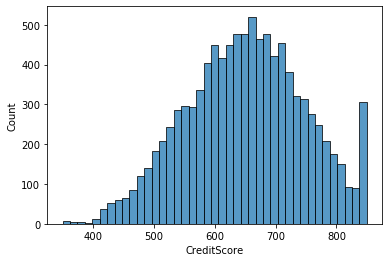

Age
1.0111685586628079


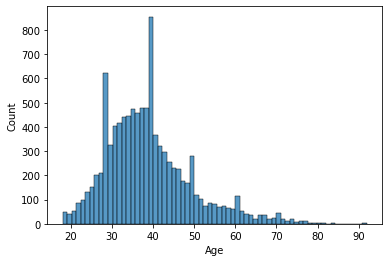

Tenure
0.010989809189781041


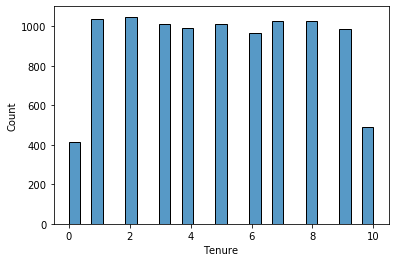

Balance
-0.14108754375291138


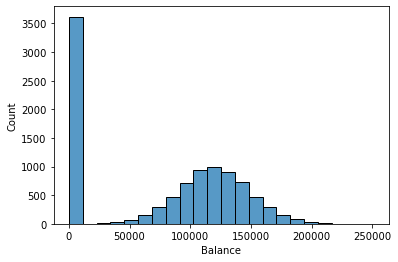

NumOfProducts
0.745456048438949


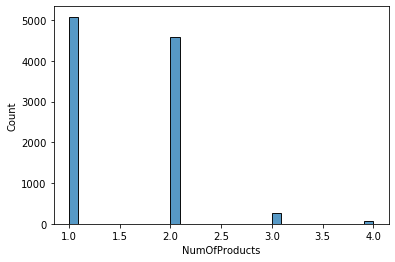

HasCrCard
-0.9016763178640548


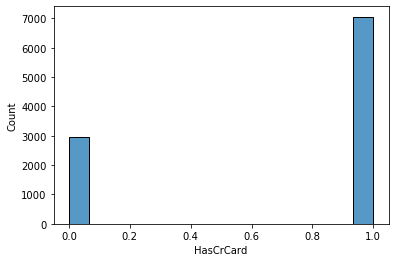

IsActiveMember
-0.06042756246298516


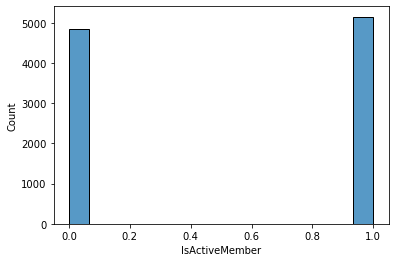

EstimatedSalary
0.0020850448448748848


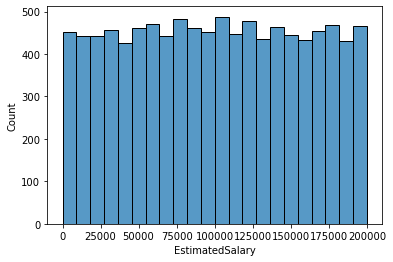

Exited
1.4713899141398699


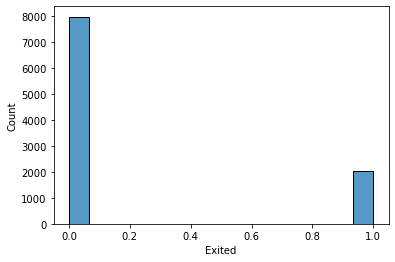

In [10]:
from scipy.stats import skew

for cols in numerical_dataset:
    print(cols)
    print(skew(numerical_dataset[cols]))
    sns.histplot(numerical_dataset[cols])
    plt.show()

In [11]:
dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [12]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [13]:
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()

X[:, 2] = gender_encoder.fit_transform(X[:, 2])

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

geography_transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [1])], remainder='passthrough')

X = geography_transformer.fit_transform(X)

## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:, [2, 4, 5, 6, 10]] = sc.fit_transform(X_train[:, [2, 4, 5, 6, 10]])
X_test[:, [2, 4, 5, 6, 10]] = sc.transform(X_test[:, [2, 4, 5, 6, 10]])

## Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2, l1, l1_l2

model = Sequential()

model.add(Dense(len(dataset.columns), 
                activation='relu')) # tf.nn.relu

# model.add(BatchNormalization())

model.add(Dense(6, 
                activation='relu'))

# model.add(BatchNormalization())

model.add(Dense(6, 
                activation='relu'))

# model.add(Dense(5, 
#                 activation='relu', 
#                 kernel_regularizer=l2(l=0.1))) # l1_l2(l1=0.1, l2=0.01)

# model.add(BatchNormalization())
model.add(Dense(1, 
                activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

log_dir = "logs\\fit"
timestamp = datetime.now().strftime("%Y-%m-%d--%H%M")
log_dir = log_dir + '\\' + timestamp

board = TensorBoard(log_dir=log_dir, histogram_freq=1)

earlystopping = EarlyStopping(monitor='val_loss',
                             mode='min',
                             verbose=1,
                             patience=2)

In [19]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

In [20]:
model.fit(x=X_train, y=y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[earlystopping])

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5192 - accuracy: 0.7945 - val_loss: 0.4587 - val_accuracy: 0.8035
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.7945 - val_loss: 0.4252 - val_accuracy: 0.8035
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4364 - accuracy: 0.7945 - val_loss: 0.4151 - val_accuracy: 0.8035
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.7955 - val_loss: 0.4105 - val_accuracy: 0.8040
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4269 - accuracy: 0.7995 - val_loss: 0.4068 - val_accuracy: 0.8090
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.8066 - val_loss: 0.4043 - val_accuracy: 0.8175
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8165 - val_loss: 0.4040 - val_accuracy: 0.8285

## Metrics

In [21]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

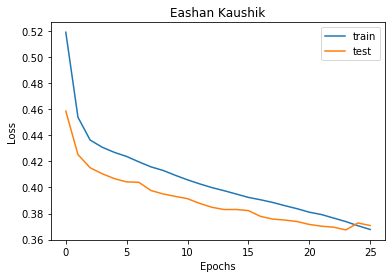

In [22]:
plt.plot(loss, label='train')
plt.plot(val_loss, label='test')
plt.legend()
plt.title('Eashan Kaushik')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
# plt.show()
plt.savefig('logs.png')

In [23]:
df = pd.DataFrame(columns=['loss', 'val_loss'])

In [24]:
df.loss = loss

In [25]:
df.val_loss = val_loss

In [26]:
df.to_csv('logs.csv')

In [27]:
from tensorflow.keras.models import load_model

model = load_model('hello.h5', compile = False)

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred = y_pred > 0.5
y_pred = np.array([1 if value[0] else 0 for value in y_pred])
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.857
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.68      0.52      0.59       393

    accuracy                           0.86      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

[[1511   96]
 [ 190  203]]


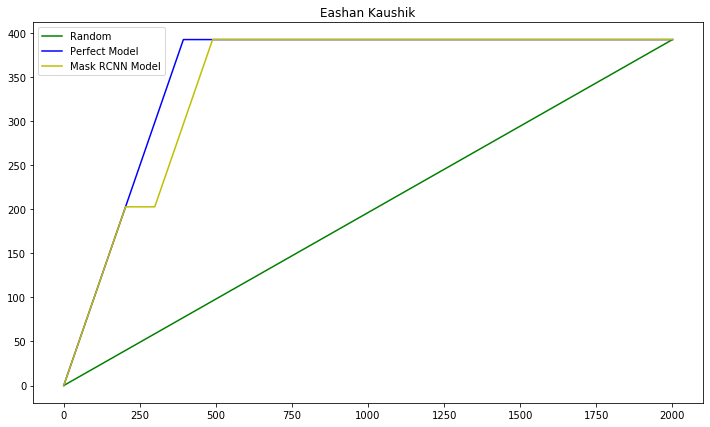

In [29]:
total = len(y_test)
one_count = np.sum(y_test)
zero_count = total - one_count

y_sort = [y for _, y in sorted(zip(y_pred, y_test), reverse=True)]

x = np.arange(0, total+1)

y_plot = np.append([0], np.cumsum(y_sort))

plt.figure(figsize=(12,7))
plt.plot([0, total], [0, one_count], 'g', label='Random')
plt.plot([0, one_count, total], [0, one_count, one_count], 'b', label='Perfect Model')
plt.plot(x, y_plot, 'y', label='Mask RCNN Model')
plt.legend()
plt.title('Eashan Kaushik')
# plt.show()
plt.savefig('CAP-Curve.png')

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, model.predict(X_test))

In [33]:
y_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [35]:
y_prob = model.predict(X_test)

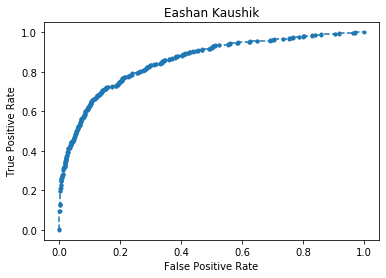

In [31]:
plt.plot(fpr, tpr, ls='--', marker='.')
plt.title('Eashan Kaushik')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.savefig('ROC-Curve.png')
# plt.show()

In [25]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [26]:
tn / (tn +fn)

0.8561111111111112

In [27]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3909 - accuracy: 0.8375


[0.39093780517578125, 0.8374999761581421]

In [28]:
# tensorboard --logdir logs/fit (command line)
# %tensorboard (jupyter)

In [55]:
y_train

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [56]:
y_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [57]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [36]:
df = pd.DataFrame(columns=['y_test', 'y_pred', 'y_prob'])

In [37]:
df.y_test = y_test
df.y_pred = y_pred
df.y_prob = y_prob

In [38]:
df.to_csv('prediction_summary.csv')